In [5]:
import pulp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
universe = pd.read_csv("diff_clean_all.csv", header=[0,1], index_col=[0])

In [19]:
universe[[("Equity","ALAT.PA"),("Equity","CEMA.L")]]

Equity          
             ALAT.PA    CEMA.L
Date                          
2016-07-01  0.000000  0.011761
2016-07-04 -0.000801 -0.000554
2016-07-05 -0.020990 -0.014123
2016-07-06 -0.010949 -0.012828
2016-07-07  0.001319  0.013469
...              ...       ...
2021-06-24  0.010053  0.006624
2021-06-25 -0.001583  0.008225
2021-06-28 -0.012911  0.003618
2021-06-29  0.008177 -0.005419
2021-06-30 -0.011595 -0.001137

[1281 rows x 2 columns]

In [27]:
pf_components = [("Equity","CSPX.L"), ("Equity", "MEUD.L"), ("Equity","CJPU.L"),("Equity","ISP6.L"), ("Equity","CSEMUS.SW"),("Equity","CECD.LN"),("Equity","CEMA.L"),("Equity","PAF.L"),("Real Estate","IPRP.AS"),("Commodities","CRB.PA")]

In [29]:
portfolio = universe[pf_components].copy()

In [57]:
pf_stats = pd.DataFrame([portfolio.mean(axis=0), portfolio.var(axis=0)], index=["return_pd","risk_pd"])

In [58]:
pf_stats = pf_stats.transpose()

In [71]:
rf_rate = 0.011
trade_days = 250

pf_stats["excess_return_pa"] = pf_stats["return_pd"] * trade_days - rf_rate
pf_stats["var_pa"] = pf_stats["risk_pd"] * trade_days

In [76]:
cov_matrix_pa = portfolio.cov() * trade_days

In [77]:
cov_matrix_pa

Equity                                          \
                         CSPX.L    MEUD.L    CJPU.L    ISP6.L CSEMUS.SW   
Equity      CSPX.L     0.025908  0.018444  0.019054  0.024761  0.019609   
            MEUD.L     0.018444  0.030427  0.016519  0.023992  0.019519   
            CJPU.L     0.019054  0.016519  0.024191  0.018651  0.017489   
            ISP6.L     0.024761  0.023992  0.018651  0.045678  0.021266   
            CSEMUS.SW  0.019609  0.019519  0.017489  0.021266  0.026167   
            CECD.LN    0.022730  0.022152  0.021422  0.020005  0.023816   
            CEMA.L     0.022969  0.019748  0.020584  0.020690  0.021235   
            PAF.L      0.002061  0.008500  0.003730 -0.002748  0.003707   
Real Estate IPRP.AS    0.015292  0.015072  0.013379  0.015387  0.018014   
Commodities CRB.PA     0.011585  0.009564  0.008365  0.014765  0.011062   

                                                    Real Estate Commodities  
                        CECD.LN    CEMA.L     PAF.L     IPRP.AS      CRB.PA  
Equity      CSPX.L     0.022730  0.022969  0.002061    0.015292    0.011585  
            MEUD.L     0.022152  0.019748  0.008500    0.015072    0.009564  
            CJPU.L     0.021422  0.020584  0.003730    0.013379    0.008365  
            ISP6.L     0.020005  0.020690 -0.002748    0.015387    0.014765  
            CSEMUS.SW  0.023816  0.021235  0.003707    0.018014    0.011062  
            CECD.LN    0.047436  0.028390  0.015242    0.017089    0.011162  
            CEMA.L     0.028390  0.036863  0.009014    0.015474    0.011559  
            PAF.L      0.015242  0.009014  0.329581    0.007482    0.000126  
Real Estate IPRP.AS    0.017089  0.015474  0.007482    0.027809    0.009156  
Commodities CRB.PA     0.011162  0.011559  0.000126    0.009156    0.028319

In [78]:
pf_stats

return_pd   risk_pd  excess_return_pa    var_pa
Equity      CSPX.L      0.000686  0.000104          0.160378  0.025908
            MEUD.L      0.000446  0.000122          0.100428  0.030427
            CJPU.L      0.000412  0.000097          0.091922  0.024191
            ISP6.L      0.000596  0.000183          0.137893  0.045678
            CSEMUS.SW   0.000530  0.000105          0.121387  0.026167
            CECD.LN     0.000377  0.000190          0.083227  0.047436
            CEMA.L      0.000616  0.000147          0.142924  0.036863
            PAF.L       0.000558  0.001318          0.128457  0.329581
Real Estate IPRP.AS     0.000144  0.000111          0.024935  0.027809
Commodities CRB.PA      0.000095  0.000113          0.012781  0.028319

In [80]:
pf_stats["excess_return_pa"]/pf_stats["var_pa"]**(1/2)

Equity       CSPX.L       0.996383
             MEUD.L       0.575745
             CJPU.L       0.591010
             ISP6.L       0.645188
             CSEMUS.SW    0.750402
             CECD.LN      0.382126
             CEMA.L       0.744405
             PAF.L        0.223757
Real Estate  IPRP.AS      0.149527
Commodities  CRB.PA       0.075950
dtype: float64

In [117]:
weights = np.random.rand(len(pf_stats))
weights = weights / weights.sum()

In [118]:
weights

array([0.12201469, 0.14204847, 0.02279741, 0.05534407, 0.21931874,
       0.01080345, 0.21747276, 0.07161259, 0.02265299, 0.11593484])

In [119]:
pf_excess_return = np.matmul(weights, pf_stats["excess_return_pa"].transpose())

In [120]:
pf_excess_return

0.11341066147067423

In [121]:
pf_var = cov_matrix_pa.mul(weights, axis=0).mul(weights, axis=1).sum().sum()

In [122]:
pf_std = pf_var**(1/2)
pf_std

0.1403796164708094

In [123]:
pf_sharpe = pf_excess_return / pf_std

In [124]:
pf_sharpe

0.8078855343949233

In [203]:
return_list = []
risk_list = []
sharpe_list = []
weights_list = []
for n in range(1000):
    weights = np.random.rand(len(pf_stats))
    weights = weights / weights.sum()
    pf_excess_return = np.matmul(weights, pf_stats["excess_return_pa"].transpose())
    return_list.append(pf_excess_return)
    pf_var = cov_matrix_pa.mul(weights, axis=0).mul(weights, axis=1).sum().sum()
    risk_list.append(pf_var**(1/2))
    pf_sharpe = pf_excess_return / (pf_var**(1/2))
    sharpe_list.append(pf_sharpe)
    weights_list.append(weights)
    

data = {"return":return_list,"risk":risk_list,"sharpe":sharpe_list}

In [204]:
weights_array = np.array(weights_list)

In [205]:
w_pd = pd.DataFrame(weights_array, columns=pd.MultiIndex.from_tuples(pf_components))

In [207]:
pf_data = pd.DataFrame(data)
pf_output = pd.merge(pf_data,w_pd, how="inner", left_index=True, right_index=True)

<ipython-input-207-e643f6e62ad0>:2: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left,2 on the right)
  pf_output = pd.merge(pf_data,w_pd, how="inner", left_index=True, right_index=True)


<AxesSubplot:xlabel='risk', ylabel='return'>

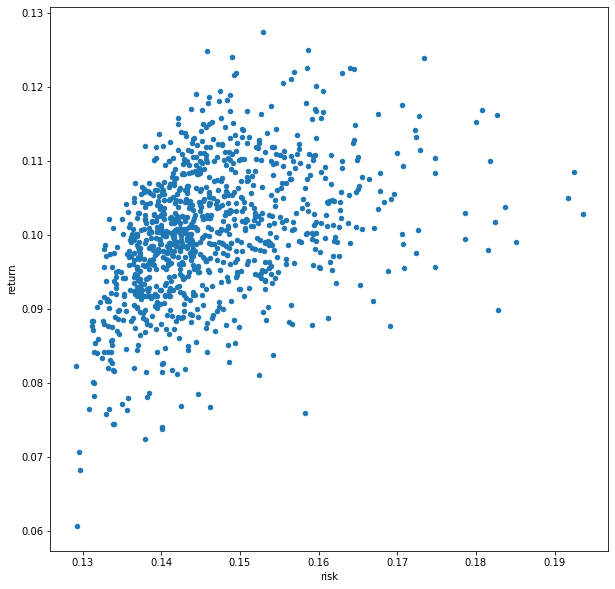

In [208]:
pf_output.plot.scatter("risk","return", figsize=(10,10))

In [209]:
pf_max = pf_output.iloc[pf_output["sharpe"].argmax()]

In [210]:
pf_max

return                    0.124861
risk                      0.145879
sharpe                    0.855924
(Equity, CSPX.L)          0.200353
(Equity, MEUD.L)          0.038696
(Equity, CJPU.L)          0.145831
(Equity, ISP6.L)          0.109268
(Equity, CSEMUS.SW)       0.054819
(Equity, CECD.LN)         0.015875
(Equity, CEMA.L)          0.305765
(Equity, PAF.L)           0.060843
(Real Estate, IPRP.AS)    0.000202
(Commodities, CRB.PA)     0.068349
Name: 116, dtype: float64

<AxesSubplot:>

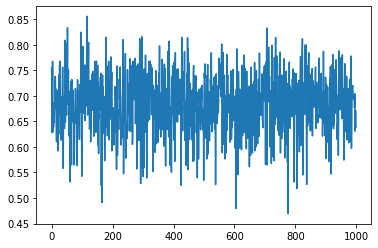

In [211]:
pf_output["sharpe"].plot()

<AxesSubplot:>

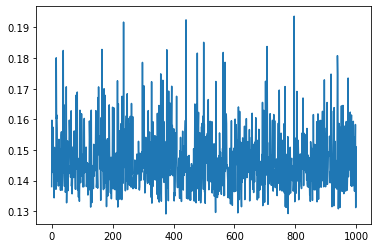

In [212]:
pf_output["risk"].plot()